In [1]:
# ***Importing Libraries***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import GridSearchCV , train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,r2_score,mean_squared_error
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# ***Importing Data***

In [3]:
tc = pd.read_csv('telecommunications_churn.csv')
tc

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53,0


# ***EDA***

In [4]:
tc.shape

(3333, 19)

In [5]:
# Displaying first few rows

tc.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


In [6]:
# Displaying last few rows

tc.tail()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53,0
3332,74,1,25,234.4,265.9,241.4,13.7,0,0,113,39.85,82,22.60,77,10.86,4,3.70,77.01,0


In [7]:
tc.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge', 'churn'],
      dtype='object')

In [8]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

In [9]:
# Displaying Summary

tc.describe()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.276628,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.096910,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,59.449754,0.144914
std,39.822106,0.447398,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.295879,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,10.502261,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,22.930000,0.000000
25%,74.000000,0.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,52.380000,0.000000
50%,101.000000,0.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,59.470000,0.000000
75%,127.000000,1.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,66.480000,0.000000
max,243.000000,1.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,96.150000,1.000000


In [10]:
# Checking Column types

tc.dtypes

account_length              int64
voice_mail_plan             int64
voice_mail_messages         int64
day_mins                  float64
evening_mins              float64
night_mins                float64
international_mins        float64
customer_service_calls      int64
international_plan          int64
day_calls                   int64
day_charge                float64
evening_calls               int64
evening_charge            float64
night_calls                 int64
night_charge              float64
international_calls         int64
international_charge      float64
total_charge              float64
churn                       int64
dtype: object

In [11]:
# checking missing values in the data 

tc.isnull().sum()

account_length            0
voice_mail_plan           0
voice_mail_messages       0
day_mins                  0
evening_mins              0
night_mins                0
international_mins        0
customer_service_calls    0
international_plan        0
day_calls                 0
day_charge                0
evening_calls             0
evening_charge            0
night_calls               0
night_charge              0
international_calls       0
international_charge      0
total_charge              0
churn                     0
dtype: int64

In [12]:
# checking the Duplicates in the data

tc.duplicated().sum()

0

# ***Data Visualisation***

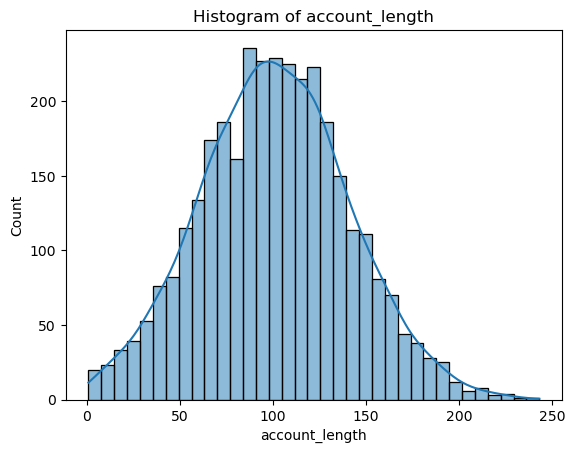

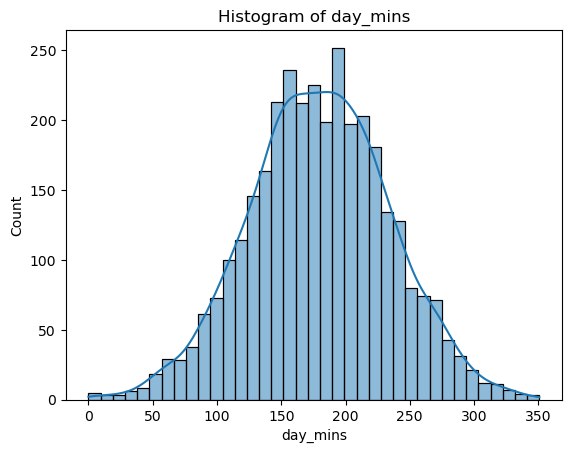

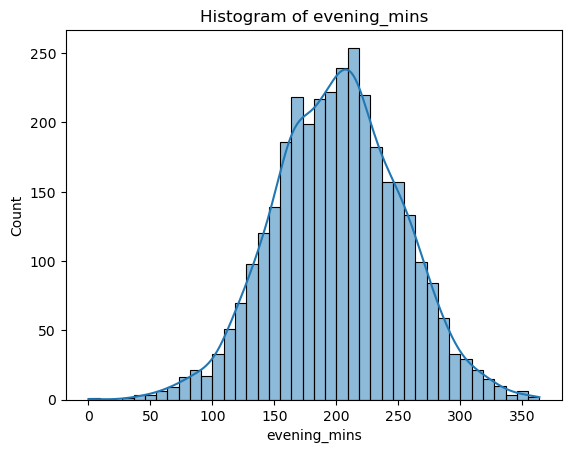

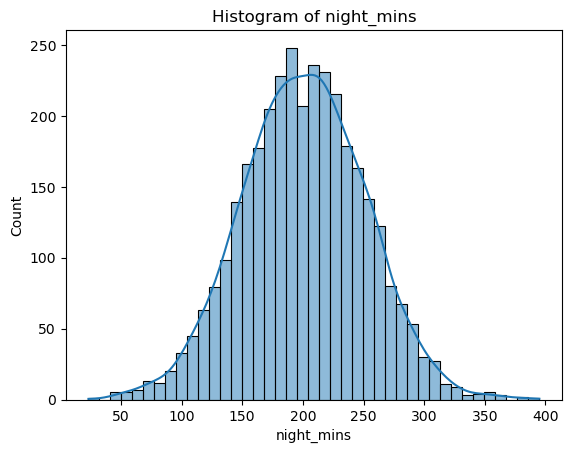

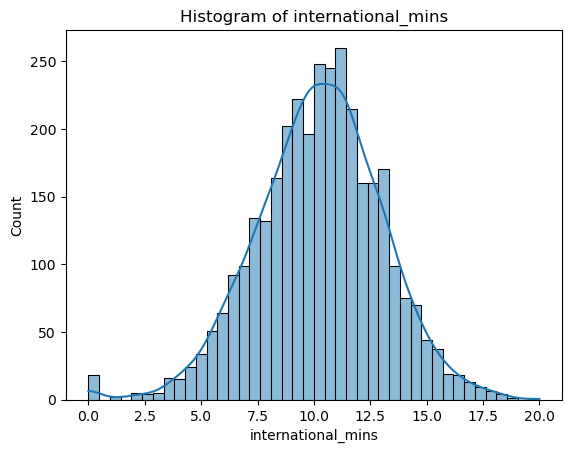

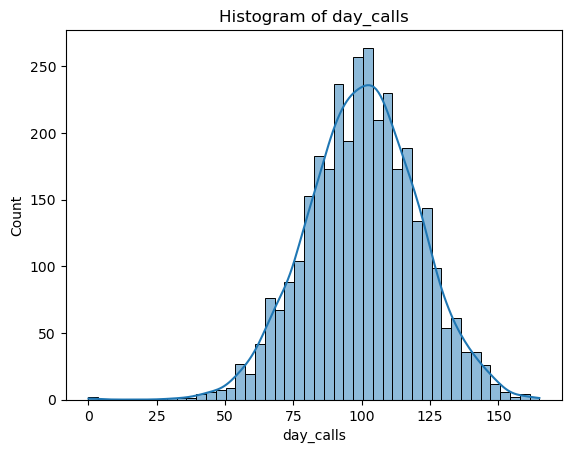

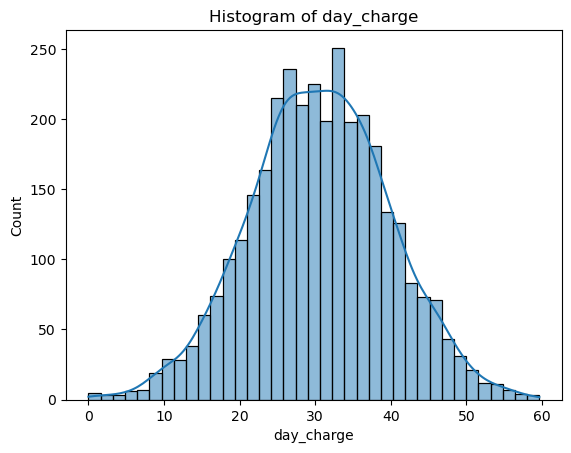

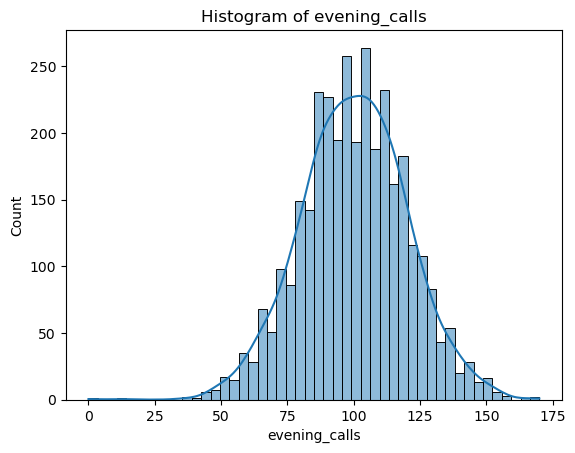

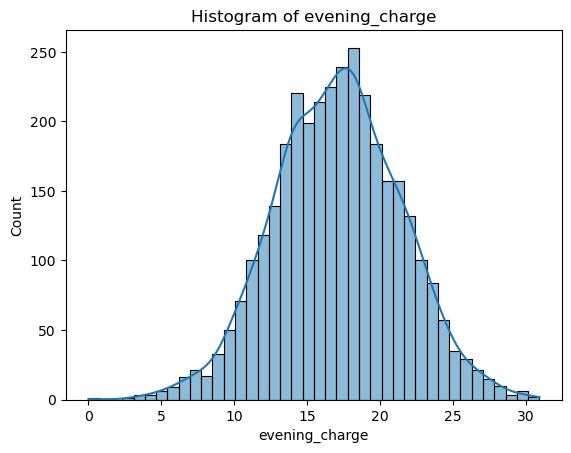

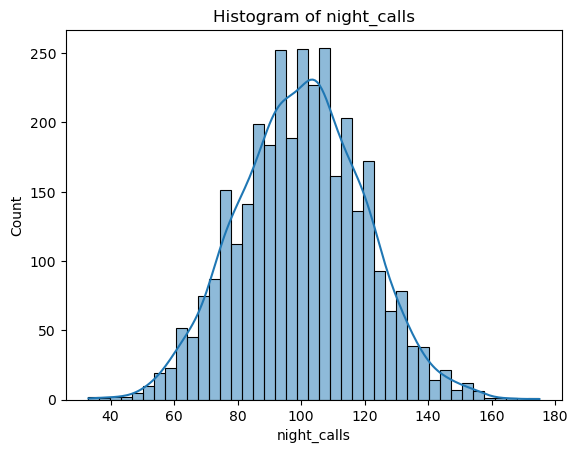

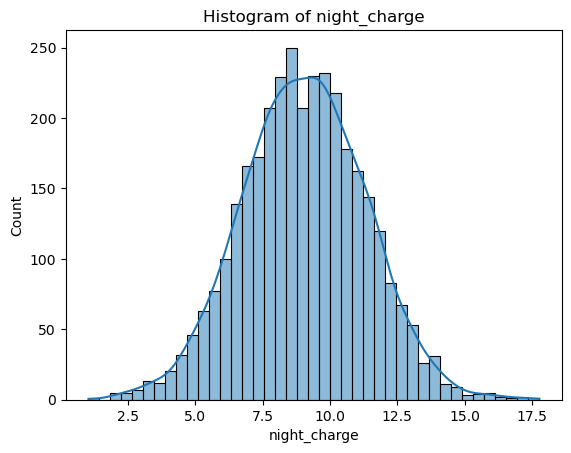

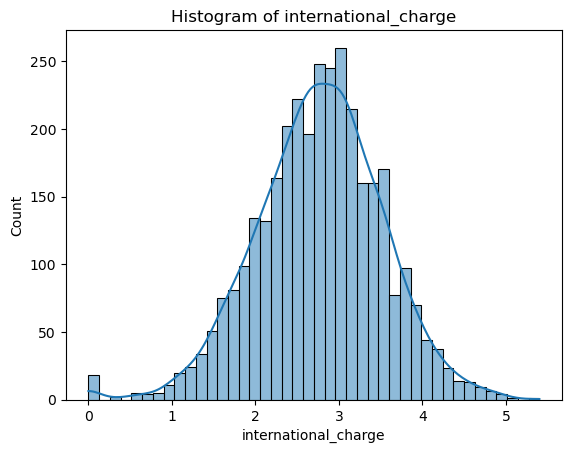

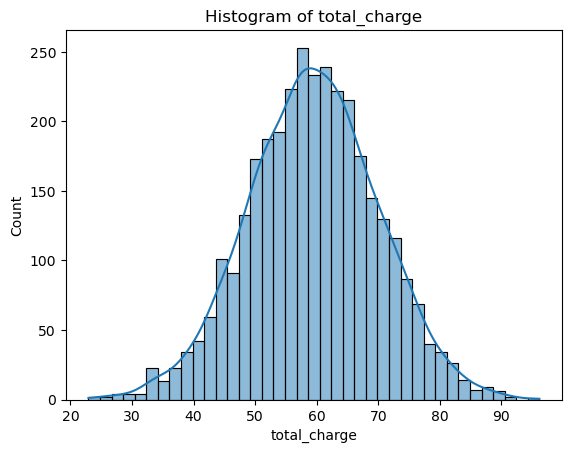

In [13]:
#Histogram

selec_cols = ['account_length', 'day_mins', 'evening_mins', 'night_mins', 'international_mins', 'day_calls', 'day_charge',
              'evening_calls', 'evening_charge', 'night_calls', 'night_charge', 'international_charge', 'total_charge']

for col in selec_cols:
    plt.figure()
    sns.histplot(tc[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

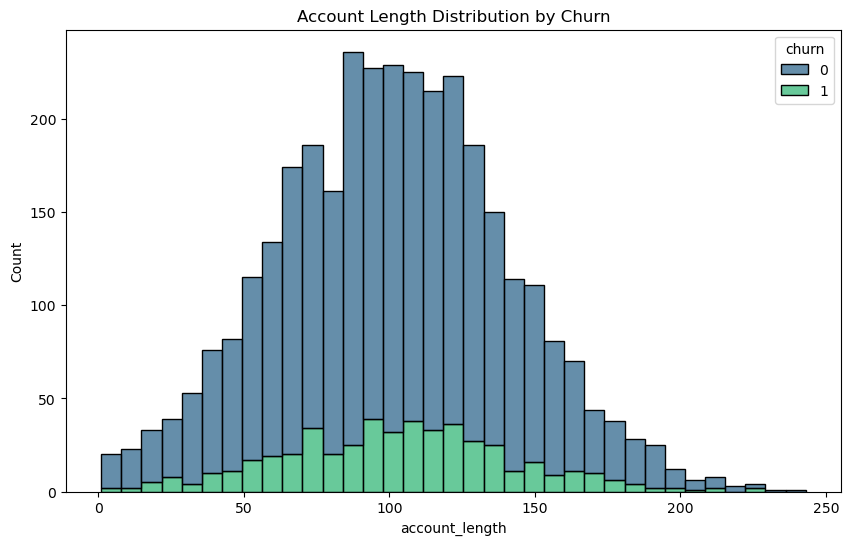

In [14]:
# Histplot

# Visualizing account length distribution for churned and non-churned customers
plt.figure(figsize=(10, 6))
sns.histplot(data=tc, x='account_length', hue='churn', multiple="stack", palette='viridis')
plt.title('Account Length Distribution by Churn')
plt.show()

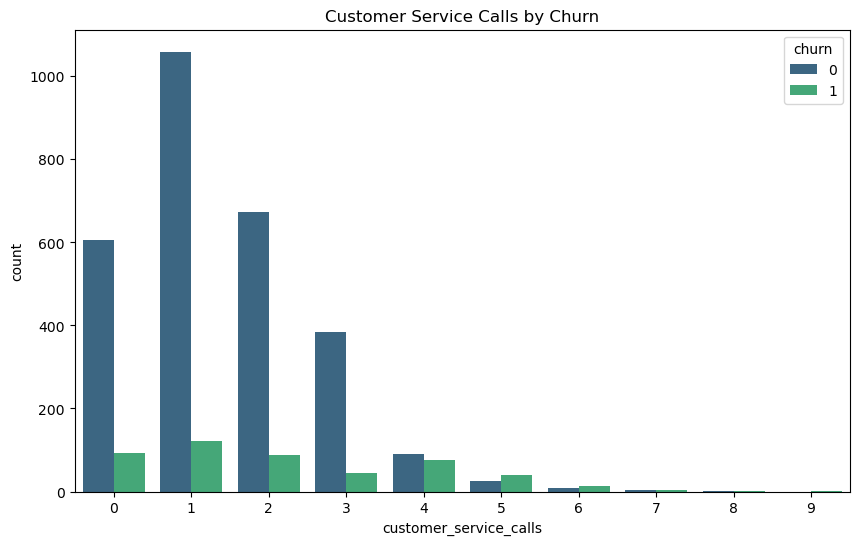

In [15]:
# Countplot

# Visualizing the impact of customer service calls on churn
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_service_calls', hue='churn', data=tc, palette='viridis')
plt.title('Customer Service Calls by Churn')
plt.show()

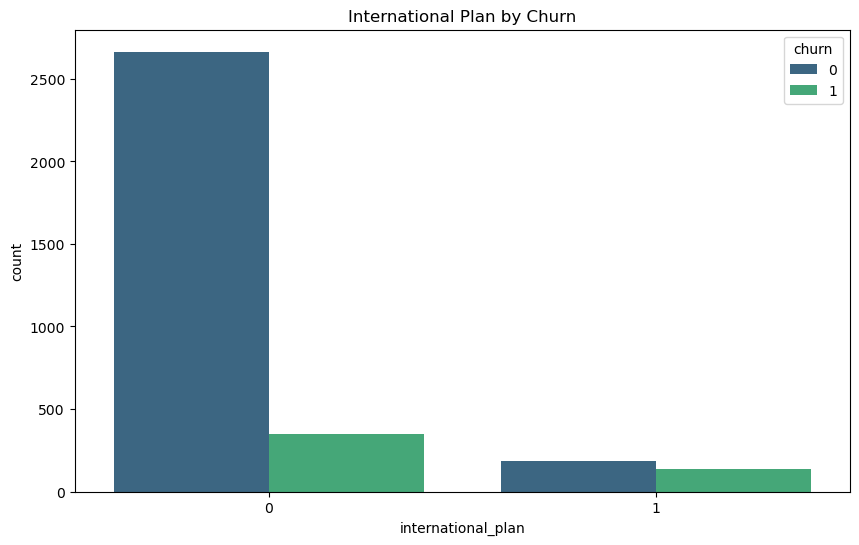

In [16]:
# Visualizing the relationship between international plan and churn
plt.figure(figsize=(10, 6))
sns.countplot(x='international_plan', hue='churn', data=tc, palette='viridis')
plt.title('International Plan by Churn')
plt.show()

Text(0, 0.5, 'international_mins')

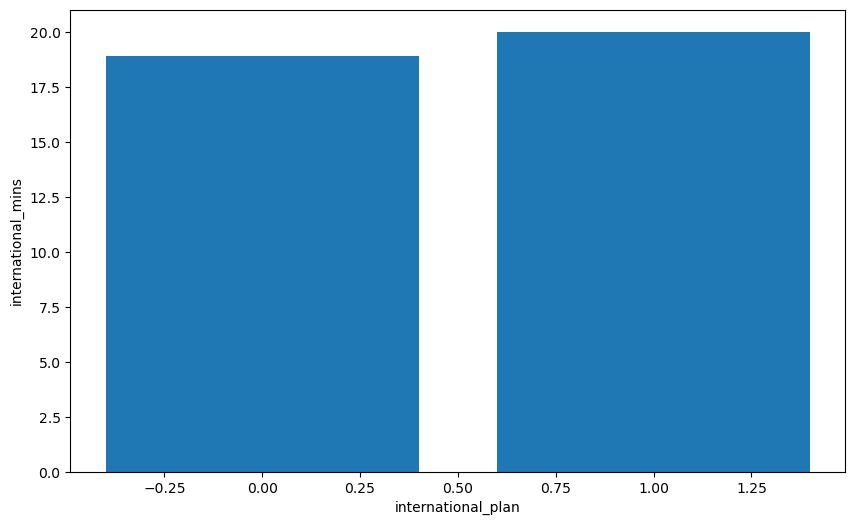

In [17]:
# Barchart

#Barchart 1
plt.figure(figsize = (10,6))
plt.bar(tc['voice_mail_plan'],tc['international_mins'])
plt.xlabel('international_plan')
plt.ylabel('international_mins')

#This combination allows you to visualize the average international minutes used by customers who have or do not have an international plan

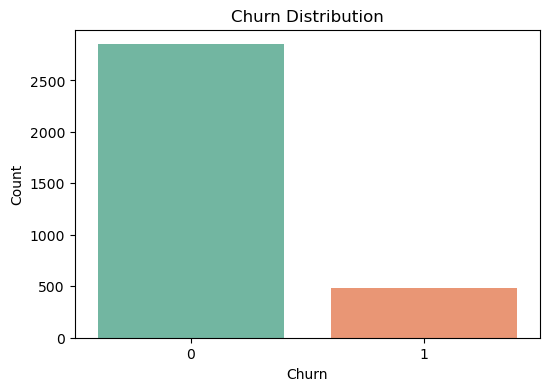

In [18]:
# Distribution of churn

plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=tc, palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

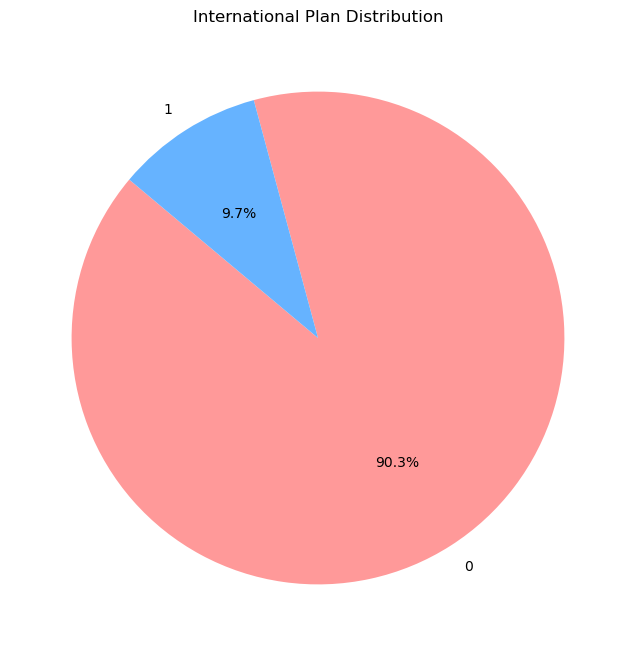

In [19]:
# Pie chart 

# pie chart for international plan distribution
international_plan_counts = tc['international_plan'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(international_plan_counts, labels=international_plan_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('International Plan Distribution')
plt.show()

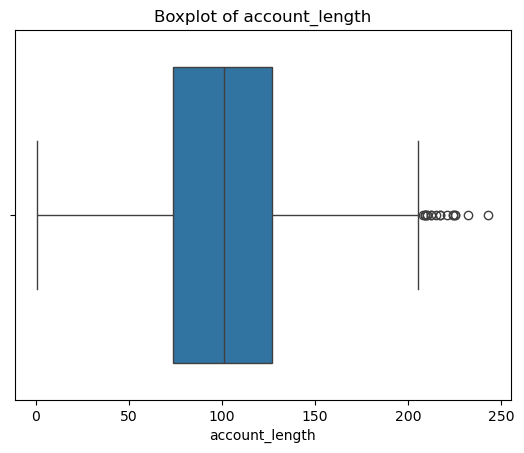

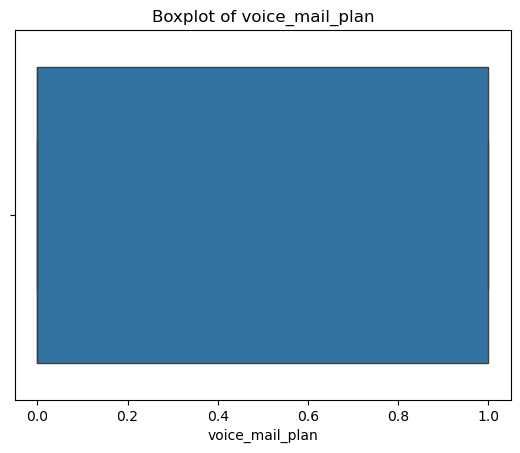

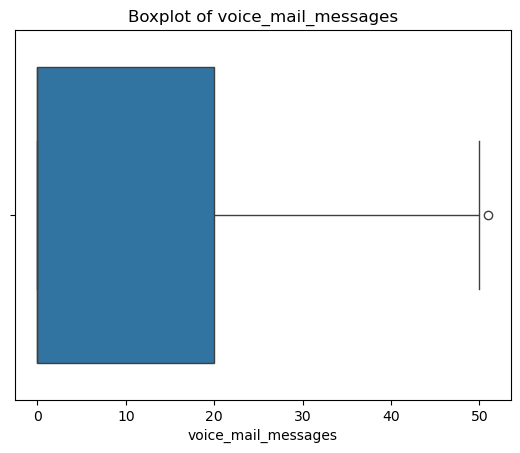

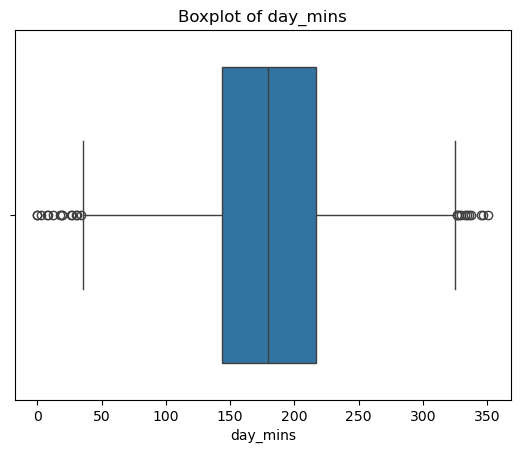

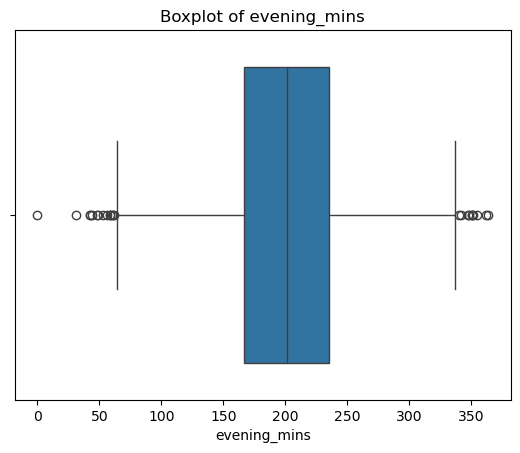

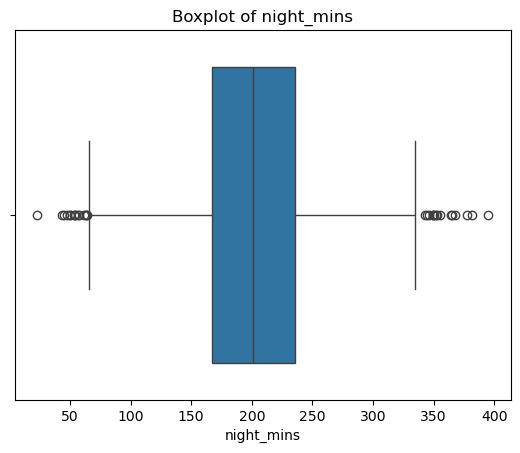

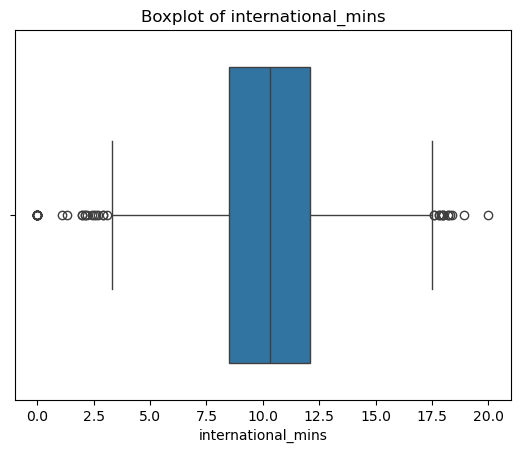

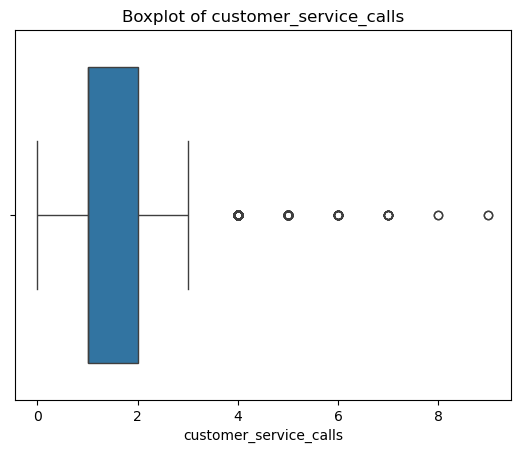

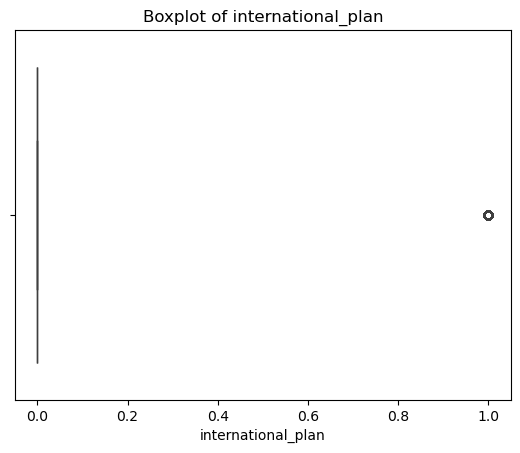

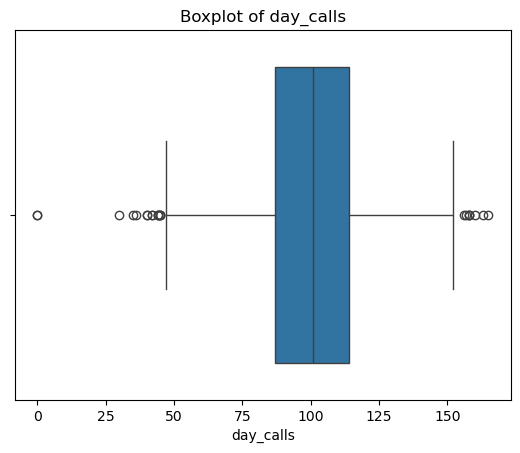

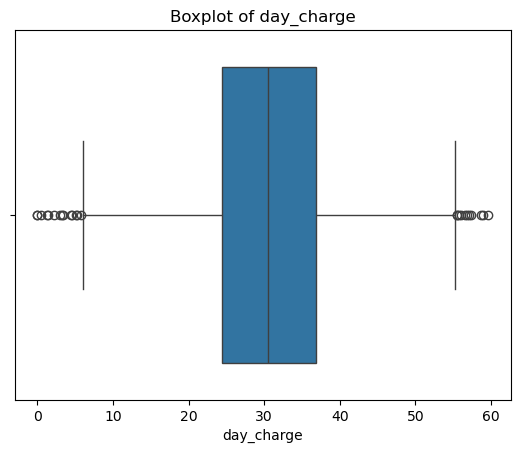

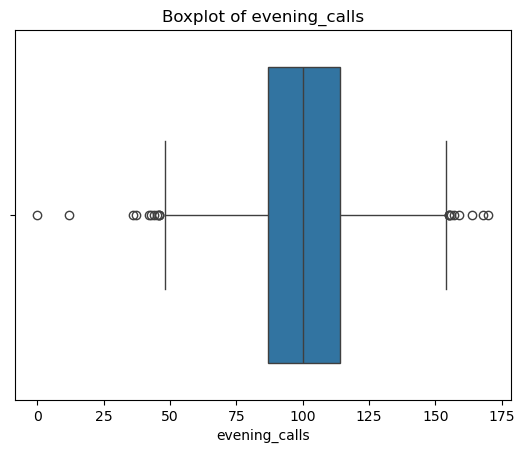

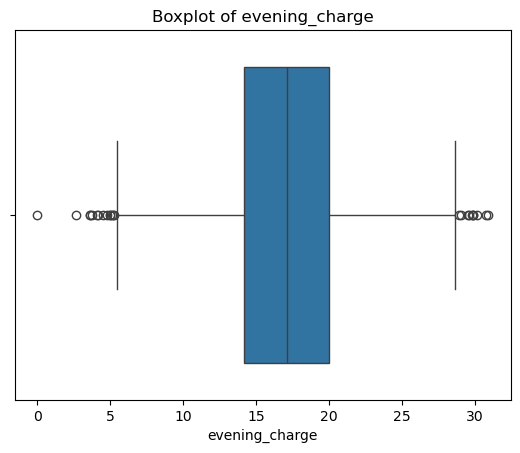

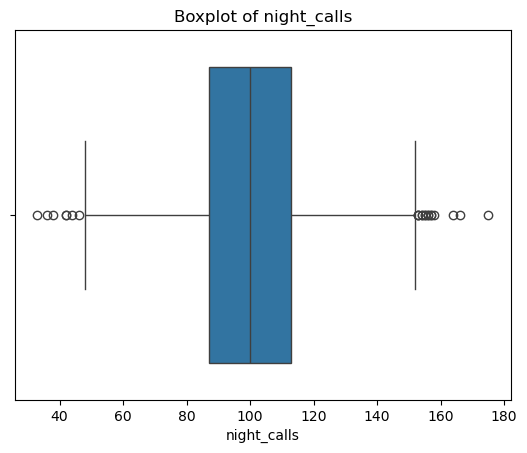

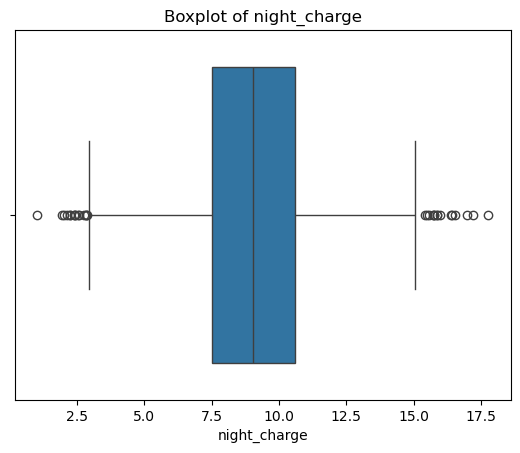

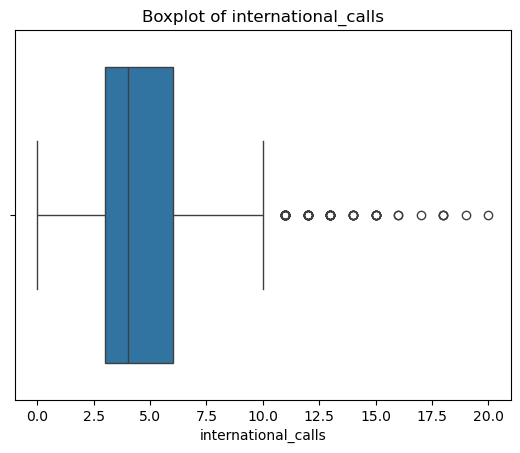

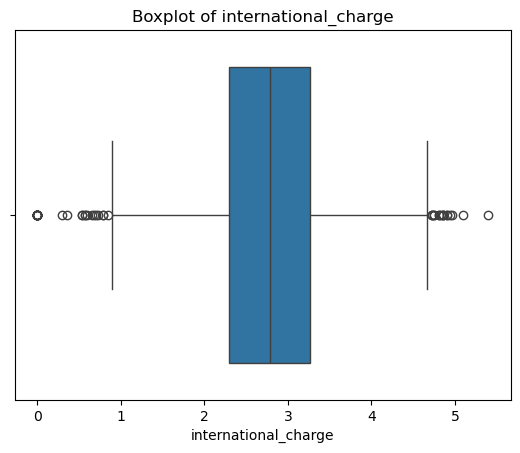

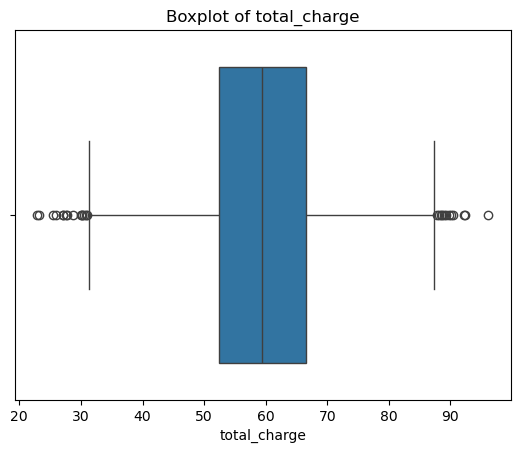

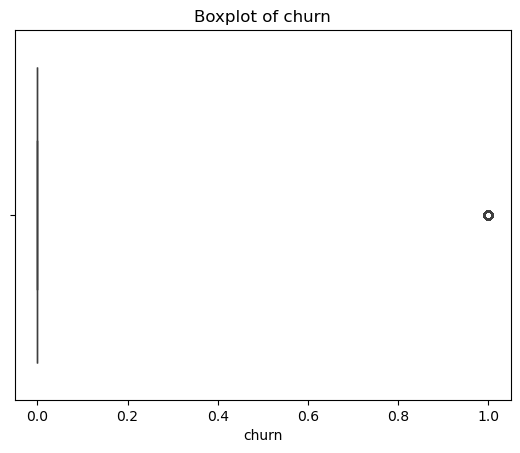

In [20]:
# Boxplot

for col in tc.columns:
    plt.figure()
    sns.boxplot(x=tc[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [21]:
# Treating Outliers using Iqr techniques

def outlier_Detection(tc, columns):
    for col in columns:
        Q1 = tc[col].quantile(0.25)
        Q3 = tc[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        # Replace outliers with upper and lower limits
        tc[col] = np.clip(tc[col], lower, upper)
    
    return tc

# np.clip(tc[col], lower, upper) is used instead of np.where, which simplifies the process of replacing values outside the IQR bounds. 
#It ensures all values below the lower bound are set to the lower value and all values above the upper bound are set to the upper value.

In [22]:
outlier_Detection(tc,['account_length','voice_mail_messages','day_mins',
       'evening_mins','night_mins','international_mins',
       'customer_service_calls','day_calls',
       'day_charge','evening_calls','evening_charge','night_calls',
       'night_charge','international_calls','international_charge',
       'total_charge'])

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128.0,1,25,265.1,197.40,244.7,10.0,1.0,0,110.0,45.07,99.0,16.78,91,11.01,3.0,2.70,75.56,0
1,107.0,1,26,161.6,195.50,254.4,13.7,1.0,0,123.0,27.47,103.0,16.62,103,11.45,3.0,3.70,59.24,0
2,137.0,0,0,243.4,121.20,162.6,12.2,0.0,0,114.0,41.38,110.0,10.30,104,7.32,5.0,3.29,62.29,0
3,84.0,0,0,299.4,63.55,196.9,6.6,2.0,1,71.0,50.90,88.0,5.40,89,8.86,7.0,1.78,66.80,0
4,75.0,0,0,166.7,148.30,186.9,10.1,3.0,1,113.0,28.34,122.0,12.61,121,8.41,3.0,2.73,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192.0,1,36,156.2,215.50,279.1,9.9,2.0,0,77.0,26.55,126.0,18.32,83,12.56,6.0,2.67,60.10,0
3329,68.0,0,0,231.1,153.40,191.3,9.6,3.0,0,57.0,39.29,55.0,13.04,123,8.61,4.0,2.59,63.53,0
3330,28.0,0,0,180.8,288.80,191.9,14.1,2.0,0,109.0,30.74,58.0,24.55,91,8.64,6.0,3.81,67.74,0
3331,184.0,0,0,213.8,159.60,139.2,5.0,2.0,1,105.0,36.35,84.0,13.57,137,6.26,10.0,1.35,57.53,0


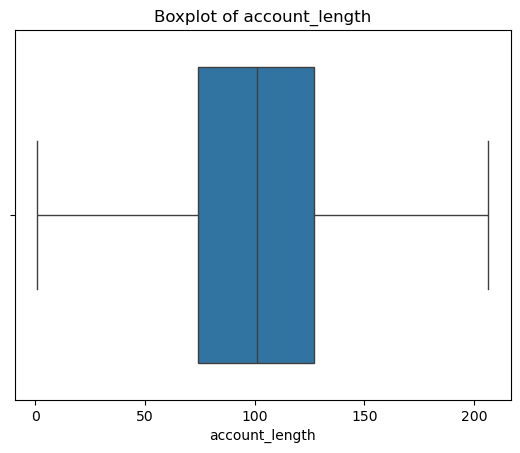

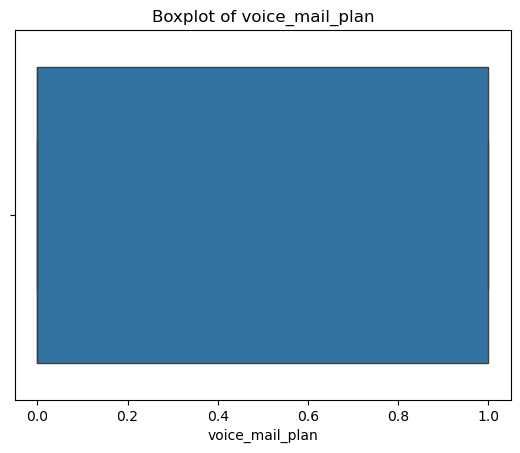

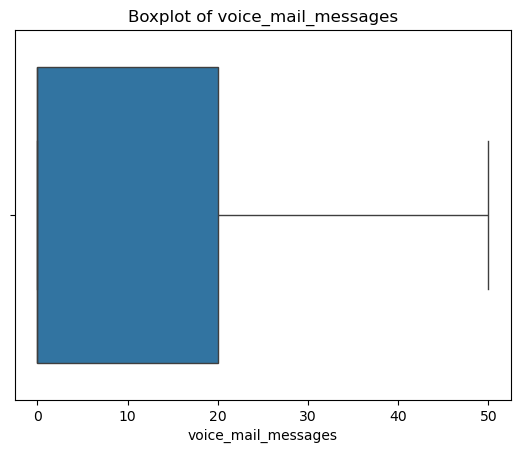

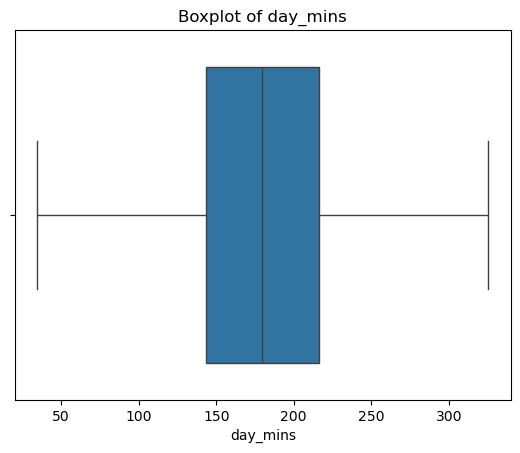

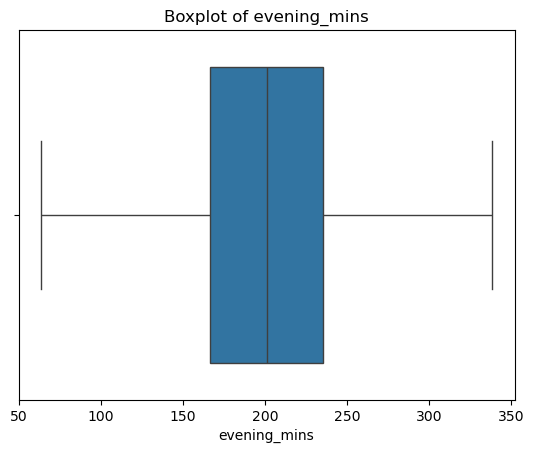

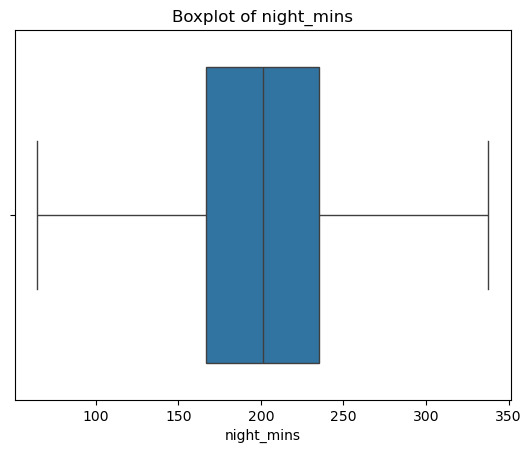

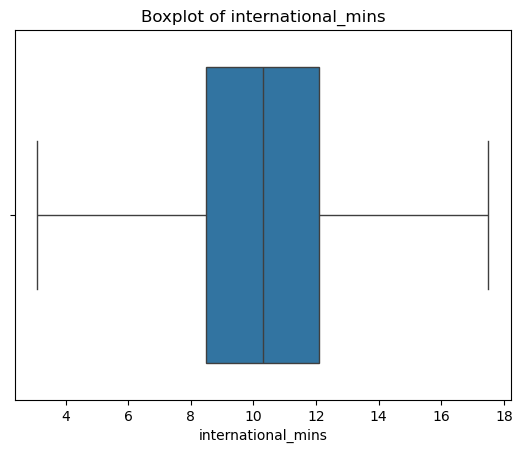

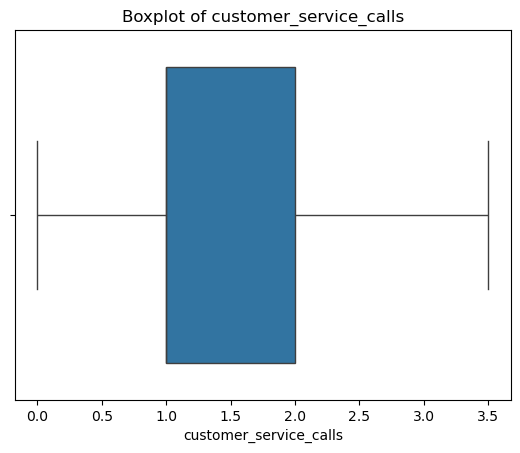

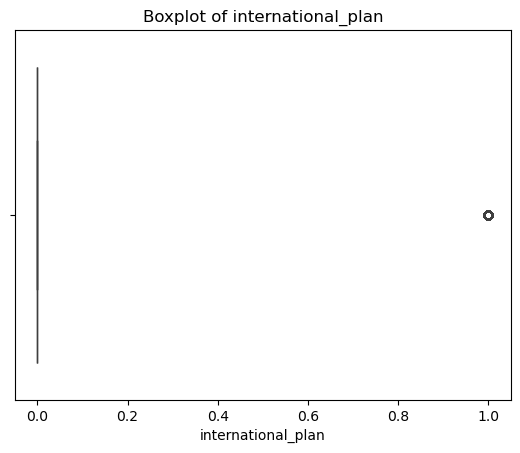

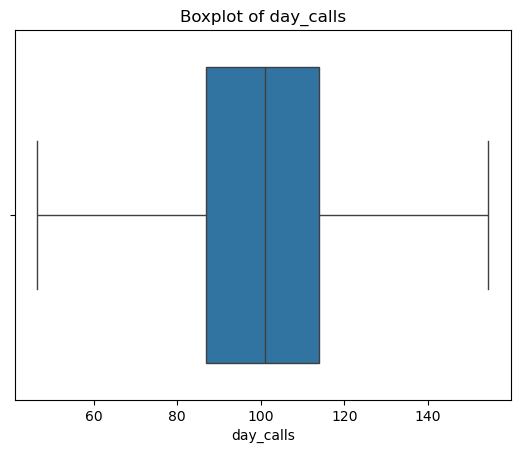

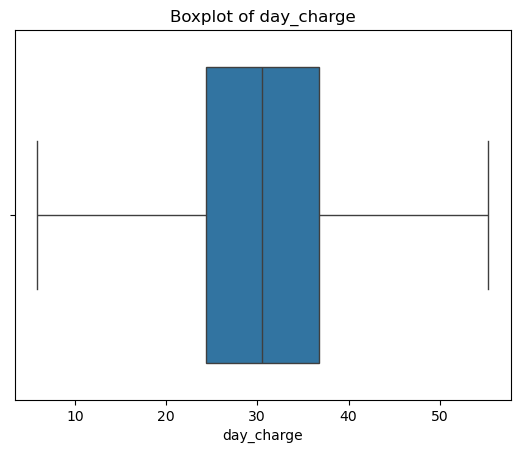

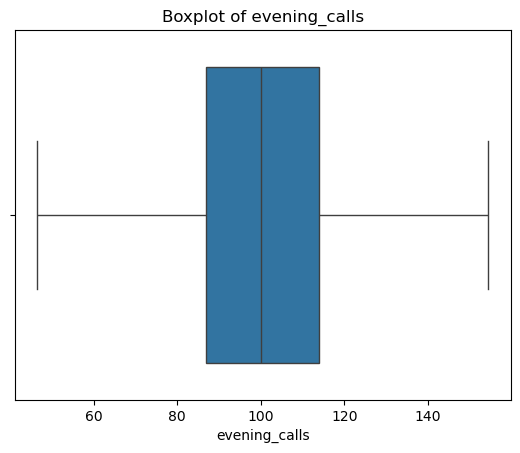

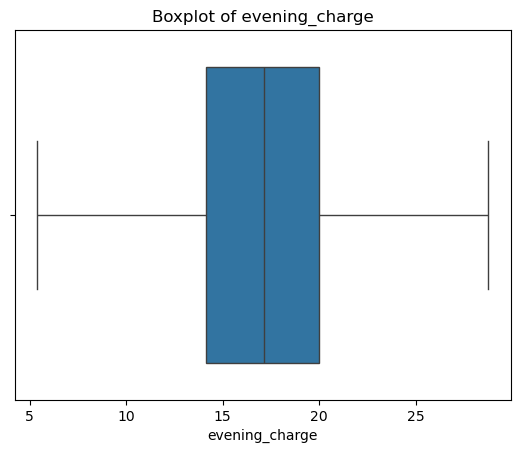

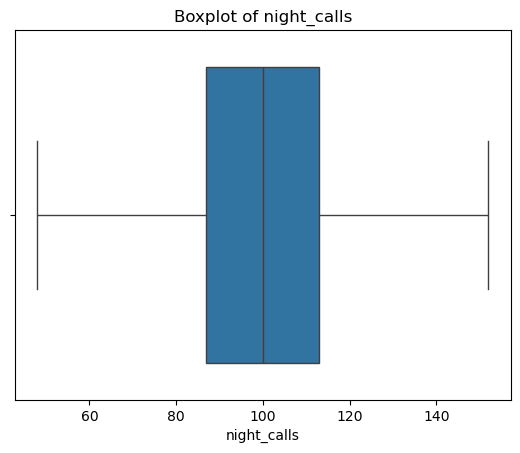

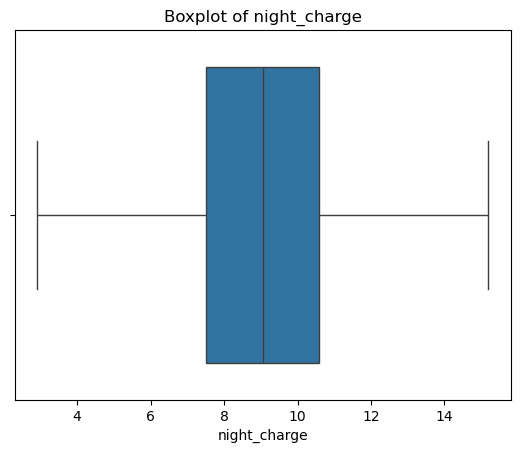

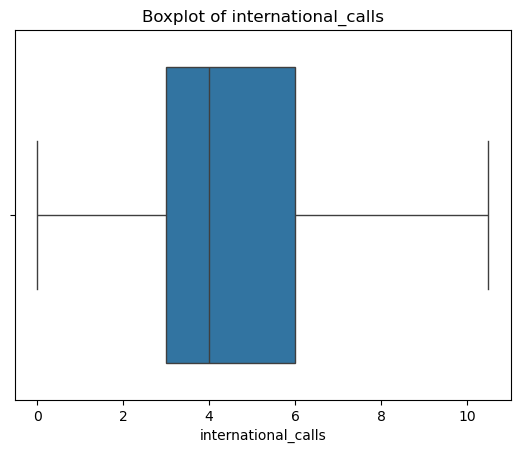

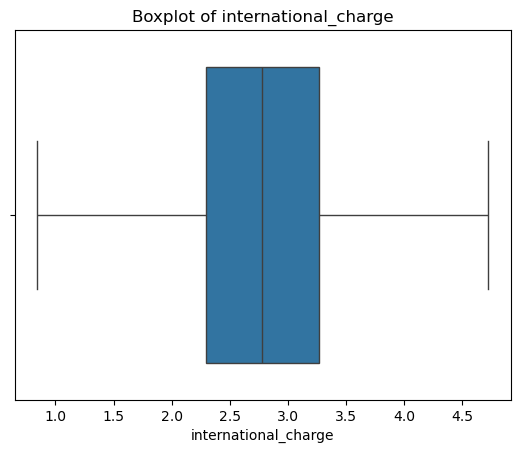

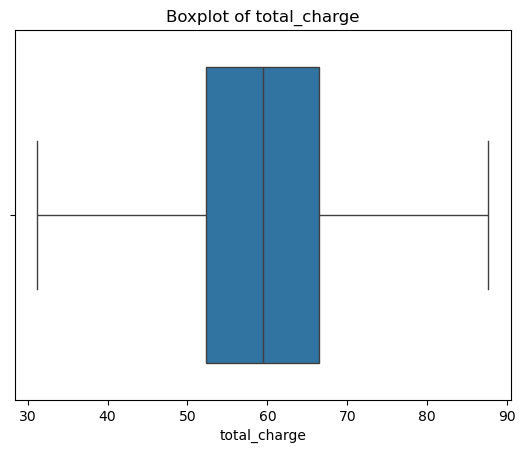

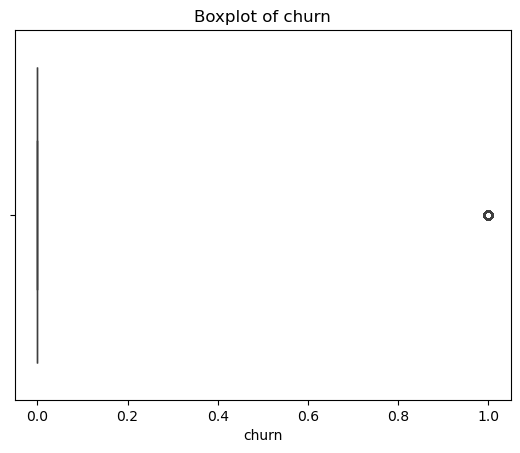

In [23]:
# Boxplot after removing Outliers

for col in tc.columns:
    plt.figure()
    sns.boxplot(x=tc[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [24]:
# After removing outlier checking the data

tc.shape

(3333, 19)

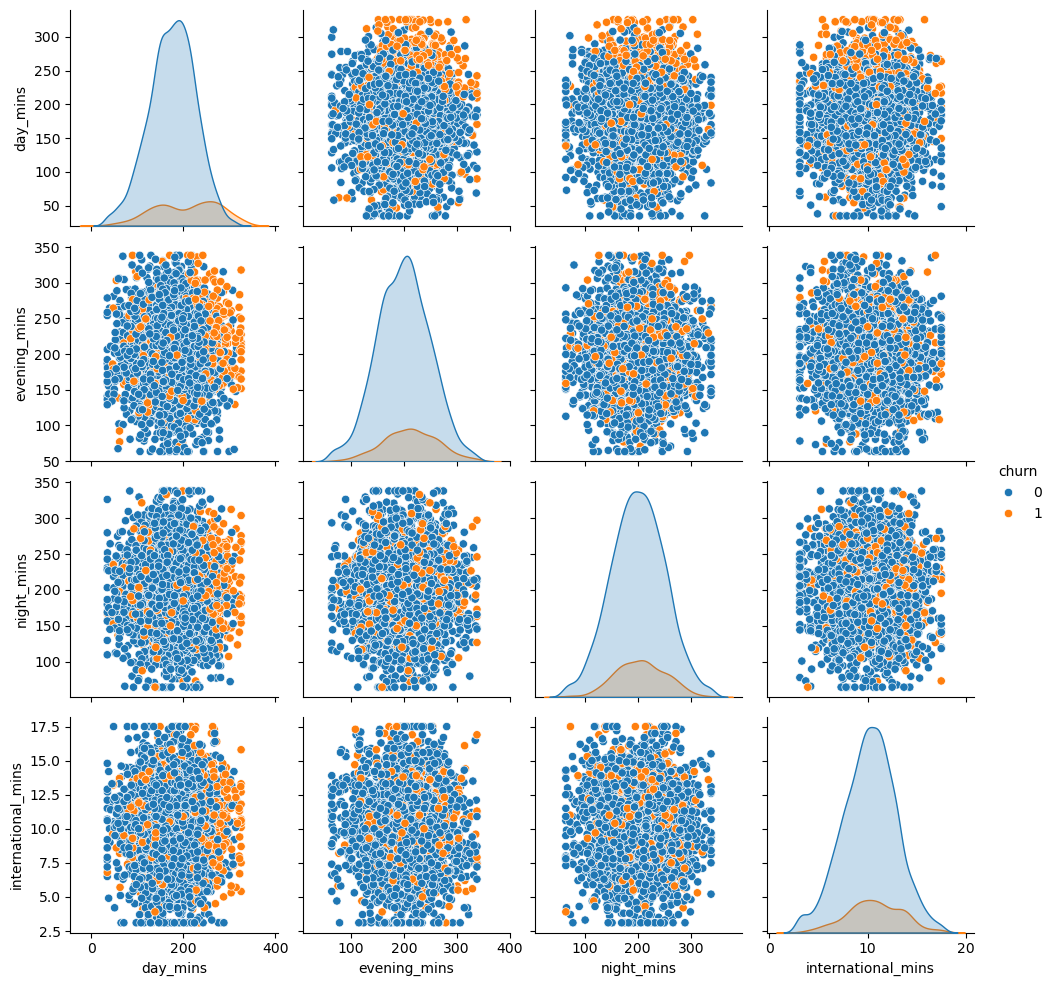

In [25]:
# pairplot

selected_features = ['day_mins','evening_mins','night_mins','international_mins','churn']
sns.pairplot(tc[selected_features], hue='churn')
plt.show()

In [26]:
# Correalation

tc.corr()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
account_length,1.000000,0.003586,-0.004007,0.007016,-0.006579,-0.009674,0.012501,-0.004441,0.024906,0.038608,0.007014,0.018693,-0.006568,-0.013312,-0.009671,0.023650,0.012563,0.002149,0.016275
voice_mail_plan,0.003586,1.000000,0.956956,-0.001364,0.021118,0.005757,-0.002495,-0.024929,0.006006,-0.011757,-0.001366,-0.007288,0.021133,0.015638,0.005738,0.003482,-0.002469,0.008880,-0.102148
voice_mail_messages,-0.004007,0.956956,1.000000,0.000998,0.017163,0.007660,0.001004,-0.020620,0.008753,-0.010258,0.000995,-0.006833,0.017180,0.007091,0.007638,0.010168,0.001014,0.009996,-0.089725
day_mins,0.007016,-0.001364,0.000998,1.000000,0.006675,0.003231,-0.011832,-0.006585,0.049078,0.002755,1.000000,0.016928,0.006661,0.023330,0.003205,0.007595,-0.011773,0.884041,0.204788
evening_mins,-0.006579,0.021118,0.017163,0.006675,1.000000,-0.013163,-0.012030,-0.016544,0.018323,-0.021362,0.006683,-0.016497,1.000000,0.006642,-0.013185,0.006744,-0.012076,0.413125,0.092109
night_mins,-0.009674,0.005757,0.007660,0.003231,-0.013163,1.000000,-0.014236,-0.008434,-0.029411,0.022214,0.003231,-0.000826,-0.013170,0.010602,0.999999,-0.005731,-0.014180,0.213314,0.036176
international_mins,0.012501,-0.002495,0.001004,-0.011832,-0.012030,-0.014236,1.000000,-0.012441,0.044909,0.021812,-0.011834,0.008145,-0.012038,-0.012457,-0.014244,0.025079,0.999992,0.053646,0.066554
customer_service_calls,-0.004441,-0.024929,-0.020620,-0.006585,-0.016544,-0.008434,-0.012441,1.000000,-0.026425,-0.019720,-0.006590,-0.000565,-0.016545,-0.012571,-0.008427,-0.005659,-0.012480,-0.015644,0.152404
international_plan,0.024906,0.006006,0.008753,0.049078,0.018323,-0.029411,0.044909,-0.026425,1.000000,0.003474,0.049080,0.005605,0.018330,0.012584,-0.029426,0.015077,0.044816,0.047605,0.259852
day_calls,0.038608,-0.011757,-0.010258,0.002755,-0.021362,0.022214,0.021812,-0.019720,0.003474,1.000000,0.002758,0.010388,-0.021358,-0.019593,0.022212,0.002031,0.021934,0.000542,0.019816


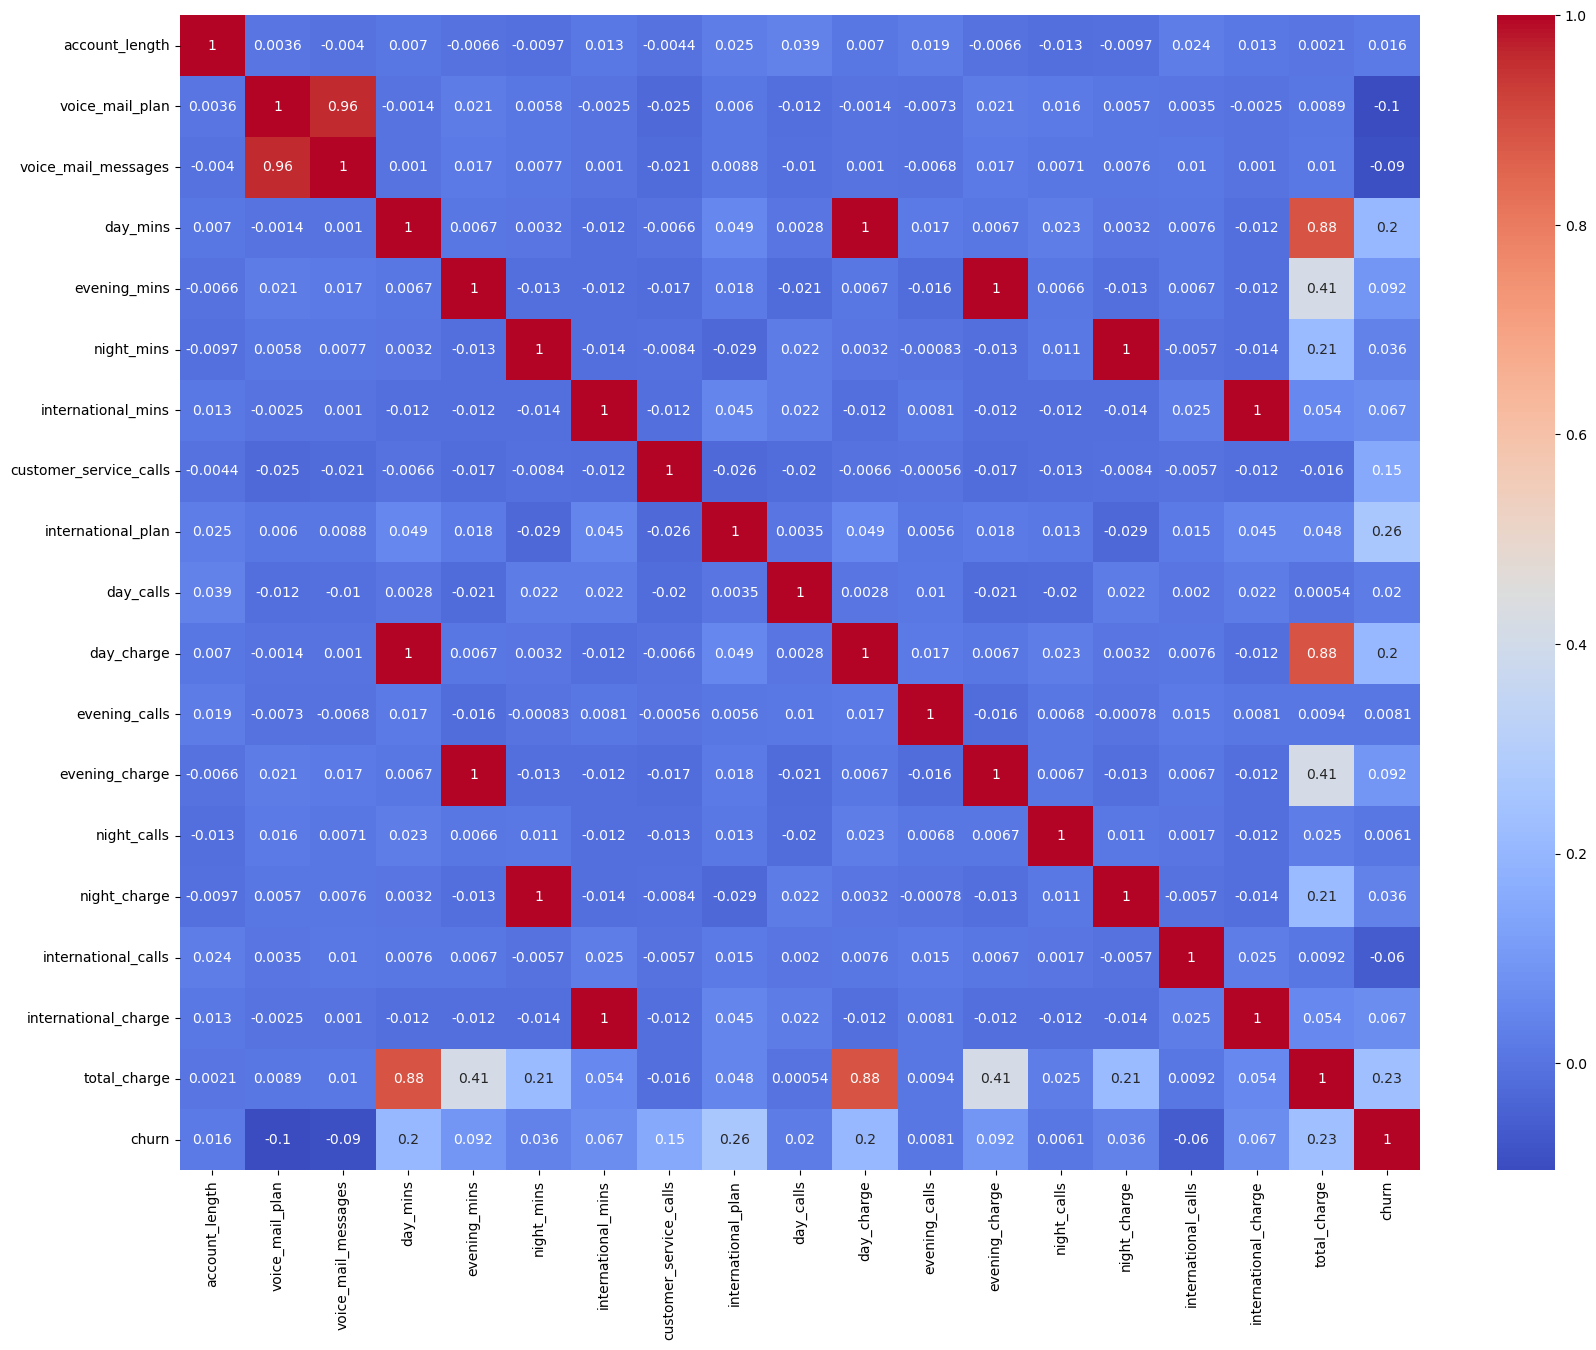

In [27]:
# Correlation Heatmap
    
plt.figure(figsize=(20,15))
sns.heatmap(tc.corr(), annot=True, cmap='coolwarm')
plt.show()

# ***Featuer Engineering***

In [28]:
# Creating the featuer for total minutes used 

tc['total_mins'] = tc['day_mins']+tc['evening_mins']+tc['night_mins']+tc['international_mins']

In [29]:
# Creating the featuer for customer engagment (Calls and Services calls)

tc['total_calls']=tc['day_calls']+tc['evening_calls']+tc['night_calls']+tc['international_calls']

In [30]:
tc.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,total_mins,total_calls
0,128.0,1,25,265.1,197.40,244.7,10.0,1.0,0,110.0,...,99.0,16.78,91,11.01,3.0,2.70,75.56,0,717.20,303.0
1,107.0,1,26,161.6,195.50,254.4,13.7,1.0,0,123.0,...,103.0,16.62,103,11.45,3.0,3.70,59.24,0,625.20,332.0
2,137.0,0,0,243.4,121.20,162.6,12.2,0.0,0,114.0,...,110.0,10.30,104,7.32,5.0,3.29,62.29,0,539.40,333.0
3,84.0,0,0,299.4,63.55,196.9,6.6,2.0,1,71.0,...,88.0,5.40,89,8.86,7.0,1.78,66.80,0,566.45,255.0
4,75.0,0,0,166.7,148.30,186.9,10.1,3.0,1,113.0,...,122.0,12.61,121,8.41,3.0,2.73,52.09,0,512.00,359.0


In [31]:
# Normalization

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
tcs = pd.DataFrame(scaler.fit_transform(tc.drop(columns=['churn'])))
tcs['churn'] = tc['churn']

#ts = pd.DataFrame(scalar.fit_transform(tc.drop(columns=['churn'])),columns=tc.columns[:-1])


In [32]:
tcs

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,churn
0,0.618005,1.0,0.50,0.792469,0.487082,0.659407,0.479167,0.285714,0.0,0.587963,...,0.486111,0.487158,0.413462,0.659202,0.285714,0.478093,0.785993,0.724034,0.516129,0
1,0.515815,1.0,0.52,0.436554,0.480167,0.694912,0.736111,0.285714,0.0,0.708333,...,0.523148,0.480308,0.528846,0.695033,0.285714,0.735825,0.496631,0.570162,0.649770,0
2,0.661800,0.0,0.00,0.717847,0.209789,0.358895,0.631944,0.000000,0.0,0.625000,...,0.587963,0.209760,0.538462,0.358713,0.476190,0.630155,0.550709,0.426660,0.654378,0
3,0.403893,0.0,0.00,0.910420,0.000000,0.484444,0.243056,0.571429,1.0,0.226852,...,0.384259,0.000000,0.394231,0.484121,0.666667,0.240979,0.630674,0.471902,0.294931,0
4,0.360097,0.0,0.00,0.454092,0.308406,0.447840,0.486111,0.857143,1.0,0.615741,...,0.699074,0.308647,0.701923,0.447476,0.285714,0.485825,0.369858,0.380833,0.774194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.929440,1.0,0.72,0.417985,0.552948,0.785322,0.472222,0.571429,0.0,0.282407,...,0.736111,0.553082,0.336538,0.785423,0.571429,0.470361,0.511879,0.629537,0.465438,0
3329,0.326034,0.0,0.00,0.675550,0.326965,0.463946,0.451389,0.857143,0.0,0.097222,...,0.078704,0.327055,0.721154,0.463762,0.380952,0.449742,0.572695,0.503596,0.221198,0
3330,0.131387,0.0,0.00,0.502579,0.819687,0.466142,0.763889,0.571429,0.0,0.578704,...,0.106481,0.819777,0.413462,0.466205,0.571429,0.764175,0.647340,0.654457,0.336406,0
3331,0.890511,0.0,0.00,0.616059,0.349527,0.273243,0.131944,0.571429,1.0,0.541667,...,0.347222,0.349743,0.855769,0.272394,0.952381,0.130155,0.466312,0.390199,0.668203,0


# ***Model Building and Evaluation***

In [33]:
x = tcs.drop(['churn'],axis=1)
y = tcs['churn']

In [34]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.618005,1.0,0.50,0.792469,0.487082,0.659407,0.479167,0.285714,0.0,0.587963,0.792476,0.486111,0.487158,0.413462,0.659202,0.285714,0.478093,0.785993,0.724034,0.516129
1,0.515815,1.0,0.52,0.436554,0.480167,0.694912,0.736111,0.285714,0.0,0.708333,0.436489,0.523148,0.480308,0.528846,0.695033,0.285714,0.735825,0.496631,0.570162,0.649770
2,0.661800,0.0,0.00,0.717847,0.209789,0.358895,0.631944,0.000000,0.0,0.625000,0.717840,0.587963,0.209760,0.538462,0.358713,0.476190,0.630155,0.550709,0.426660,0.654378
3,0.403893,0.0,0.00,0.910420,0.000000,0.484444,0.243056,0.571429,1.0,0.226852,0.910396,0.384259,0.000000,0.394231,0.484121,0.666667,0.240979,0.630674,0.471902,0.294931
4,0.360097,0.0,0.00,0.454092,0.308406,0.447840,0.486111,0.857143,1.0,0.615741,0.454086,0.699074,0.308647,0.701923,0.447476,0.285714,0.485825,0.369858,0.380833,0.774194


In [35]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [36]:
# Train test Split

xtrain, xtest, ytrain, ytest = train_test_split (x, y, test_size=0.2, random_state=42)

In [37]:
xtrain.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
817,1.000000,0.0,0.0,0.209250,0.364447,0.730783,0.243056,0.571429,0.0,0.421296,0.209345,0.152778,0.364298,0.673077,0.730863,0.571429,0.240979,0.223227,0.410938,0.405530
1373,0.520681,0.0,0.0,0.265990,0.473617,0.528367,0.069444,1.000000,0.0,0.541667,0.265979,0.587963,0.473459,0.432692,0.528094,0.380952,0.068299,0.262057,0.392039,0.557604
679,0.360097,0.0,0.0,0.645633,0.958697,0.525073,0.388889,0.285714,1.0,0.291667,0.645631,0.597222,0.958904,0.538462,0.524837,0.857143,0.387887,0.817199,0.805820,0.511521
56,0.681265,0.0,0.0,0.317228,0.423763,0.279100,0.340278,0.285714,0.0,0.476852,0.317152,0.143519,0.423801,0.769231,0.278909,0.190476,0.338918,0.250709,0.286670,0.456221
1993,0.413625,0.0,0.0,0.624656,0.737809,0.547035,0.097222,0.000000,0.0,0.458333,0.624595,0.282407,0.738014,0.596154,0.546824,0.285714,0.096649,0.692021,0.697107,0.437788


In [38]:
xtest.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
438,0.545012,0.0,0.0,0.413858,0.971798,0.456991,0.722222,0.285714,0.0,0.430556,0.413835,0.550926,0.971747,0.721154,0.456433,0.285714,0.722938,0.627482,0.676033,0.617512
2674,0.321168,0.0,0.0,0.256018,0.559862,0.453331,0.673611,0.000000,0.0,0.652778,0.256068,0.717593,0.559932,0.894231,0.453176,0.571429,0.673969,0.314539,0.407091,0.907834
1345,0.472019,0.0,0.0,0.000000,0.349527,0.375366,0.256944,1.000000,0.0,0.000000,0.000000,0.773148,0.349743,0.384615,0.375000,0.095238,0.256443,0.000000,0.140241,0.343318
1957,0.710462,0.0,0.0,0.612620,0.511463,0.335469,0.493056,0.285714,0.0,0.300926,0.612662,0.412037,0.511558,0.625000,0.335098,0.190476,0.490979,0.568794,0.500084,0.433180
2148,0.462287,0.0,0.0,0.376032,0.586426,0.597182,0.479167,0.285714,0.0,0.513889,0.376011,0.245370,0.586473,0.413462,0.597313,0.666667,0.478093,0.448582,0.538719,0.377880


In [39]:
# Automatic Model Building

def prediction(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print (f"Train Accuracy :{model.score(xtrain,ytrain)}")
    print (f"Test Accuracy : {model.score(xtest,ytest)}")
    print (classification_report(ytest,ypred))

In [40]:
# By using Logistic Regression model

prediction(LogisticRegression())

Train Accuracy :0.8675918979744937
Test Accuracy : 0.8515742128935532
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       566
           1       0.54      0.13      0.21       101

    accuracy                           0.85       667
   macro avg       0.70      0.55      0.56       667
weighted avg       0.81      0.85      0.81       667



In [41]:
# By using SVC model

prediction(SVC())

Train Accuracy :0.9294823705926482
Test Accuracy : 0.9160419790104948
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       566
           1       0.88      0.51      0.65       101

    accuracy                           0.92       667
   macro avg       0.90      0.75      0.80       667
weighted avg       0.91      0.92      0.91       667



In [42]:
# By using KNeighbors Classifier

prediction(KNeighborsClassifier())

Train Accuracy :0.9234808702175544
Test Accuracy : 0.9085457271364318
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       566
           1       0.84      0.49      0.62       101

    accuracy                           0.91       667
   macro avg       0.88      0.73      0.78       667
weighted avg       0.90      0.91      0.90       667



In [43]:
# By using Decision Tree Classifier

prediction(DecisionTreeClassifier())

Train Accuracy :1.0
Test Accuracy : 0.952023988005997
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       566
           1       0.82      0.88      0.85       101

    accuracy                           0.95       667
   macro avg       0.90      0.92      0.91       667
weighted avg       0.95      0.95      0.95       667



In [44]:
# By using Random Forest Classifier

prediction(RandomForestClassifier())

Train Accuracy :1.0
Test Accuracy : 0.9790104947526237
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       566
           1       1.00      0.86      0.93       101

    accuracy                           0.98       667
   macro avg       0.99      0.93      0.96       667
weighted avg       0.98      0.98      0.98       667



In [45]:
best_model = RandomForestClassifier(random_state=42)
best_model.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [46]:
# On which paramter does this paramter has been trained

best_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [47]:
# Prediction with test data

model_pred = best_model.predict(xtest)
model_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [48]:
# Residual

residual = ytest-model_pred
residual

438     0
2674    0
1345    0
1957    0
2148    0
       ..
2577    0
2763    0
3069    0
1468    0
582     0
Name: churn, Length: 667, dtype: int64

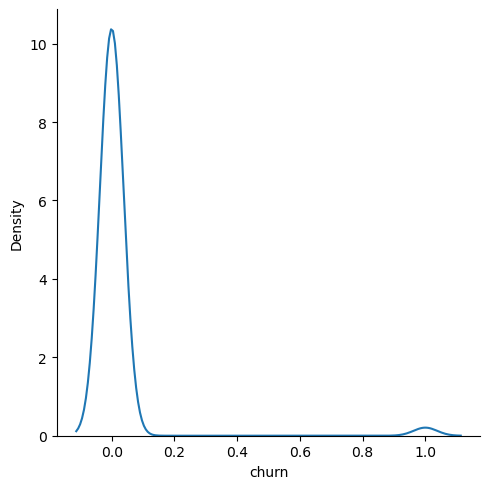

In [49]:
# plotting the residual

sns.displot(residual,kind="kde")

# ***Deployment***

In [50]:
import joblib
import nbformat
import streamlit as st
from nbconvert import PythonExporter
from flask import Flask, request, jsonify

In [51]:
# saving the training model

joblib.dump(best_model,'telecommunication_churn_model.pkl')
print(" Model saved as 'telecommunication_churn_model.pkl'")

 Model saved as 'telecommunication_churn_model.pkl'


In [52]:
# Load the Notebook

notebook_filename = "Telecommunication Churn .ipynb"
with open (notebook_filename, 'r', encoding='utf-8') as notebook_file:
    notebook_content = nbformat.read( notebook_file, as_version=4 )

FileNotFoundError: [Errno 2] No such file or directory: 'Telecommunication Churn .ipynb'

In [ ]:
# Converting to python script

python_exporter = PythonExporter()
python_code, _ = python_exporter.from_notebook_node(notebook_content)

In [ ]:
# Saving to a '.py' file

python_filename = notebook_filename.replace('.ipynb','.py')
with open(python_filename, 'w', encoding='utf-8') as python_file:
    python_file.write(python_code)

print(f" Notebook converted to {python_filename}")

In [ ]:
# Loading the train model
# Replacing it with model file name

Model_File = 'telecommunication_churn_model.pkl' 
model = joblib.load(Model_File)

In [ ]:
# Streamlit App Title

st.title('Telecommunication Model Churn Prediction')
st.write("Enter the Values to predict the churn")

In [ ]:
# Input fields for churn 

account_length = st.number_input("Account Length", min_value=0)
voice_mail_plan = st.selectbox("Voice Mail Plan", options=[0, 1])  # 0 = No, 1 = Yes
voice_mail_messages = st.number_input("Voice Mail Messages", min_value=0)
day_mins = st.number_input("Day Minutes", min_value=0.0)
evening_mins = st.number_input("Evening Minutes", min_value=0.0)
night_mins = st.number_input("Night Minutes", min_value=0.0)
international_mins = st.number_input("International Minutes", min_value=0)
customer_service_calls = st.number_input("Customer Service Calls", min_value=0)
international_plan = st.selectbox("International Plan", options=[0, 1])  # 0 = No, 1 = Yes
day_calls = st.number_input("Day Calls", min_value=0)
day_charge = st.number_input("Day Charge", min_value=0.0)
evening_calls = st.number_input("Evening Calls", min_value=0)
evening_charge = st.number_input("Evening Charge", min_value=0.0)
night_calls = st.number_input("Night Calls", min_value=0)
night_charge = st.number_input("Night Charge", min_value=0.0)
international_calls = st.number_input("International Calls", min_value=0)
international_charge = st.number_input("International Charge", min_value=0.0)
total_charge = st.number_input("Total Charge", min_value=0.0)

In [ ]:
if st.button(" Predict "):
    # Creating input array

    missing_feature_1 = 0  # Replace with actual missing feature
    missing_feature_2 = 0  # Replace with actual missing feature
    
    input_features = np.array([account_length, voice_mail_plan, voice_mail_messages, day_mins, evening_mins, night_mins,
                               international_mins, customer_service_calls, international_plan, day_calls, day_charge, evening_calls,
                               evening_charge, night_calls, night_charge, international_calls, international_charge, total_charge,
                              missing_feature_1,missing_feature_2])
    
   # Reshape the input features to be a 2D array (1 sample with 19 features)
    input_features = input_features.reshape(1, -1)
    
    # Making a Prediction
    predicted_churn = model.predict(input_features)[0]

    # Displaying the result
    st.success(f"The Predicted Churn is : {predicted_churn:.2f}")


In [ ]:
# The End